<a href="https://colab.research.google.com/github/FunkeMonke/University/blob/main/Final6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("tictoc")
library(tictoc)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
tic()
install.packages("caTools")
toc()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘bitops’




8.566 sec elapsed


In [ ]:
tic()
install.packages("caret")
toc()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’




405.923 sec elapsed


In [ ]:
library(tidyverse)
library(caret)
library(caTools)
library(tictoc)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




In [ ]:
tic()
IC <- read_csv("item_categories.csv")
items <- read_csv("items.csv")
ST <- read_csv("sales_train.csv")
SS <- read_csv("sample_submission.csv")
shops <- read_csv("shops.csv")
test <- read_csv("test.csv")
toc()

Rows: 84 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): item_category_name
dbl (1): item_category_id

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 22170 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): item_name
dbl (2): item_id, item_category_id

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 2935849 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): date
dbl (5): date_block_num, shop_id, item_id, item_price, item_cnt_day

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet thi

3.453 sec elapsed


In [ ]:
all <- list(IC, items, ST, SS, shops, test)

In [ ]:
mapply(function(x){sum(is.na(x))},all)
mapply(function(x){sum(is.null(x))},all)
lapply(all, dim)
lapply(all, names)

[1] 0 0 0 0 0 0

[1] 0 0 0 0 0 0

[[1]]
[1] 84  2

[[2]]
[1] 22170     3

[[3]]
[1] 2935849       6

[[4]]
[1] 214200      2

[[5]]
[1] 60  2

[[6]]
[1] 214200      3

[[1]]
[1] "item_category_name" "item_category_id"  

[[2]]
[1] "item_name"        "item_id"          "item_category_id"

[[3]]
[1] "date"           "date_block_num" "shop_id"        "item_id"       
[5] "item_price"     "item_cnt_day"  

[[4]]
[1] "ID"             "item_cnt_month"

[[5]]
[1] "shop_name" "shop_id"  

[[6]]
[1] "ID"      "shop_id" "item_id"

In [ ]:
tic()
# Make "date" a Date type instead of Character
all[[3]] <- all[[3]] %>%
  mutate(date = as.Date(all[[3]]["date"][[1]], "%d.%m.%Y"))

df3 <- all[[3]]
  #filter(as.Date("01.01.2013", "%d.%m.%Y") < date & date < as.Date("01.02.2013", "%d.%m.%Y")) #%>%
  #arrange(date)

# 3 + 6
df36 <- left_join(df3, all[[6]], by = "item_id")

df36_1 <- df36 %>%
  filter(shop_id.x == shop_id.y)

df36_2 <- df36_1 %>%
  mutate(shop_id = shop_id.y) %>%
  select(-c(shop_id.x, shop_id.y))

# 3 + 6 + 5
df365 <- left_join(df36_2, all[[5]], by = "shop_id")

# 3 + 6 + 5 + 4
df3654 <- left_join(df365, all[[4]], by = "ID")

# 3 + 6 + 5 + 4 + 2
df36542 <- left_join(df3654, all[[2]], by = "item_id")

# 3 + 6 + 5 + 4 + 2 + 1
df365421 <- left_join(df36542, all[[1]], by = "item_category_id")

# 3 + 6 + 5 + 4 + 2 + 1
# into a less annoying name
df <-df365421
head(df)
dim(df)
toc()

date,date_block_num,item_id,item_price,item_cnt_day,ID,shop_id,shop_name,item_cnt_month,item_name,item_category_id,item_category_name
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>
2013-01-02,0,22154,999,1,150983,59,"Ярославль ТЦ ""Альтаир""",0.5,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
2013-01-03,0,2574,399,2,56520,25,"Москва ТРК ""Атриум""",0.5,DEL REY LANA Born To Die The Paradise Edition 2CD,55,Музыка - CD локального производства
2013-01-05,0,2574,399,1,56520,25,"Москва ТРК ""Атриум""",0.5,DEL REY LANA Born To Die The Paradise Edition 2CD,55,Музыка - CD локального производства
2013-01-07,0,2574,399,1,56520,25,"Москва ТРК ""Атриум""",0.5,DEL REY LANA Born To Die The Paradise Edition 2CD,55,Музыка - CD локального производства
2013-01-08,0,2574,399,2,56520,25,"Москва ТРК ""Атриум""",0.5,DEL REY LANA Born To Die The Paradise Edition 2CD,55,Музыка - CD локального производства
2013-01-10,0,2574,399,1,56520,25,"Москва ТРК ""Атриум""",0.5,DEL REY LANA Born To Die The Paradise Edition 2CD,55,Музыка - CD локального производства


[1] 1224439      12

10.596 sec elapsed


In [ ]:
df_new <- df %>%
  select(where(is.numeric)) %>%
  mutate(shop_id = as.factor(shop_id)) %>%
  mutate(item_category_id = as.factor(item_category_id)) %>%
  select(4,1:3,5:8) %>%
  select(-ID,-item_cnt_month)%>%

  group_by(item_category_id) %>%
  filter(item_price > quantile(item_price, 0.25), 
         item_price < quantile(item_price, 0.75))
head(df_new)

df_x <- df_new %>%
  select(-item_cnt_day)
head(df_x)

item_cnt_day,date_block_num,item_id,item_price,shop_id,item_category_id
<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
1,0,2607,279,25,55
1,0,2607,279,25,55
1,0,2614,299,25,55
1,0,2614,299,25,55
1,0,2703,599,25,30
1,0,2088,1299,25,58


date_block_num,item_id,item_price,shop_id,item_category_id
<dbl>,<dbl>,<dbl>,<fct>,<fct>
0,2607,279,25,55
0,2607,279,25,55
0,2614,299,25,55
0,2614,299,25,55
0,2703,599,25,30
0,2088,1299,25,58


In [ ]:
dim(count(df_new,item_category_id))

[1] 51  2

In [ ]:
set.seed(123)
split = sample.split(df_new$item_cnt_day, SplitRatio = 0.8)
training_set = subset(df_new, split == TRUE)
test_set = subset(df_new, split == FALSE)


In [ ]:
# Multivariable linear
mul_lin = lm(formula = item_cnt_day ~ .,
               data = training_set)
# Make predictions
predictions_lin <- mul_lin %>% predict(test_set)
# Model performance
data.frame(
  RMSE = RMSE(predictions_lin, test_set$item_cnt_day),
  R2 = R2(predictions_lin, test_set$item_cnt_day)
)

Warning message in predict.lm(., test_set):
“prediction from a rank-deficient fit may be misleading”


RMSE,R2
<dbl>,<dbl>
1.043772,0.06418771


In [ ]:
# polynomial linear, 1 x variable
pol_lin <- lm(item_cnt_day ~ polym(date_block_num, degree=4, raw=TRUE), data = training_set)

# Make predictions
predictions_pol1 <- pol_lin %>% predict(test_set)
# Model performance
data.frame(
  RMSE = RMSE(predictions_pol1, test_set$item_cnt_day),
  R2 = R2(predictions_pol1, test_set$item_cnt_day)
)

RMSE,R2
<dbl>,<dbl>
1.075684,0.002069941


In [ ]:
# polynomial linear, all x variables
mul_pol_lin <- lm(item_cnt_day ~ polym(date_block_num, item_id, item_price, shop_id, item_category_id, degree=4, raw=TRUE), data = training_set)

# Make predictions
predictions_polall <- mul_pol_lin %>% predict(test_set)
# Model performance
data.frame(
  RMSE = RMSE(predictions_polall, test_set$item_cnt_day),
  R2 = R2(predictions_polall, test_set$item_cnt_day)
)

RMSE,R2
<dbl>,<dbl>
1.055002,0.04341552


In [ ]:
## polynomial linear, all x variables. date_block_num, item_price at 4th degree, the rest at 1st
mul_pol_lin2 <- lm(item_cnt_day ~ polym(date_block_num, item_price, degree=4, raw=TRUE) + item_id + shop_id + item_category_id, data = training_set)

# Make predictions
predictions_pol_some <- mul_pol_lin2 %>% predict(test_set)
# Model performance
data.frame(
  RMSE = RMSE(predictions_pol_some, test_set$item_cnt_day),
  R2 = R2(predictions_pol_some, test_set$item_cnt_day)
)

Warning message in predict.lm(., test_set):
“prediction from a rank-deficient fit may be misleading”


RMSE,R2
<dbl>,<dbl>
1.041927,0.06753493


In [ ]:
# Multivariable linear
mul_lin = lm(formula = item_cnt_day ~ .,
               data = training_set)
# Make predictions
predictions_lin <- mul_lin %>% predict(test_set)
# Model performance
data.frame(
  RMSE = RMSE(predictions_lin, test_set$item_cnt_day),
  R2 = R2(predictions_lin, test_set$item_cnt_day)
)

Warning message in predict.lm(., test_set):
“prediction from a rank-deficient fit may be misleading”


RMSE,R2
<dbl>,<dbl>
1.043772,0.06418771


In [ ]:
dim(test_set)

[1] 92468     6

In [ ]:
pred_lin <- data.frame(predictions_lin)

In [ ]:
head(pred_lin)

,predictions_lin
,<dbl>
1,1.241190
2,1.414320
3,1.416030
4,1.416030
5,1.230516
6,1.414320


In [ ]:
head(test_set)

item_cnt_day,date_block_num,item_id,item_price,shop_id,item_category_id
<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
1,0,2614,299,25,55
1,0,2703,599,25,30
1,0,2252,599,25,30
1,0,2252,599,25,30
1,0,2678,999,25,23
1,0,2703,599,25,30


In [ ]:
test_set_new <- test_set %>%
  cbind(pred_lin) %>%
  select(1,7,2:6)

In [ ]:
head(test_set_new)

item_cnt_day,predictions_lin,date_block_num,item_id,item_price,shop_id,item_category_id
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
1,1.241190,0,2614,299,25,55
1,1.414320,0,2703,599,25,30
1,1.416030,0,2252,599,25,30
1,1.416030,0,2252,599,25,30
1,1.230516,0,2678,999,25,23
1,1.414320,0,2703,599,25,30


In [ ]:
df_month_result <- test_set_new %>%
  ungroup()%>%
  group_by(date_block_num) %>%
  summarise(sum_pred = sum(predictions_lin), sum_actual = sum(item_cnt_day)) %>%
  arrange(date_block_num)

In [ ]:
head(df_month_result)

date_block_num,sum_pred,sum_actual
<dbl>,<dbl>,<dbl>
0,1633.830,1610
1,1498.605,1444
2,2130.671,2353
3,1468.845,1355
4,1436.835,1317
5,1795.816,1652


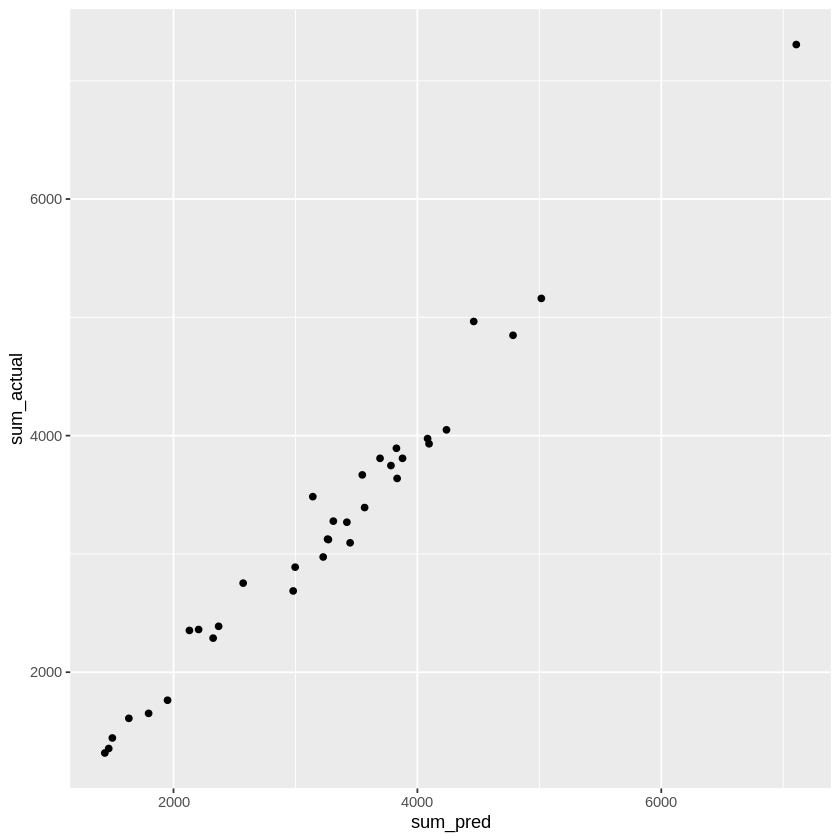

In [ ]:
ggplot(df_month_result) +
  geom_point(aes(sum_pred,sum_actual))

In [ ]:
set.seed(123)
split = sample.split(df_month_result$sum_actual, SplitRatio = 0.8)
training_set = subset(df_month_result, split == TRUE)
test_set = subset(df_month_result, split == FALSE)

In [ ]:
# Multivariable linear
mul_lin = lm(formula = sum_actual ~ sum_pred,
               data = training_set)
# Make predictions
predictions_lin <- mul_lin %>% predict(test_set)
# Model performance
data.frame(
  RMSE = RMSE(predictions_lin, test_set$sum_actual),
  R2 = R2(predictions_lin, test_set$sum_actual)
)

RMSE,R2
<dbl>,<dbl>
177.5484,0.9914342


In [ ]:
df_shop_result <- test_set_new %>%
  ungroup()%>%
  group_by(shop_id) %>%
  summarise(sum_pred = sum(predictions_lin), sum_actual = sum(item_cnt_day)) %>%
  arrange(shop_id)

In [ ]:
head(df_shop_result)

shop_id,sum_pred,sum_actual
<fct>,<dbl>,<dbl>
2,1364.096,1337
3,1273.184,1263
4,1777.528,1743
5,1763.619,1741
6,3637.908,3617
7,2650.422,2627


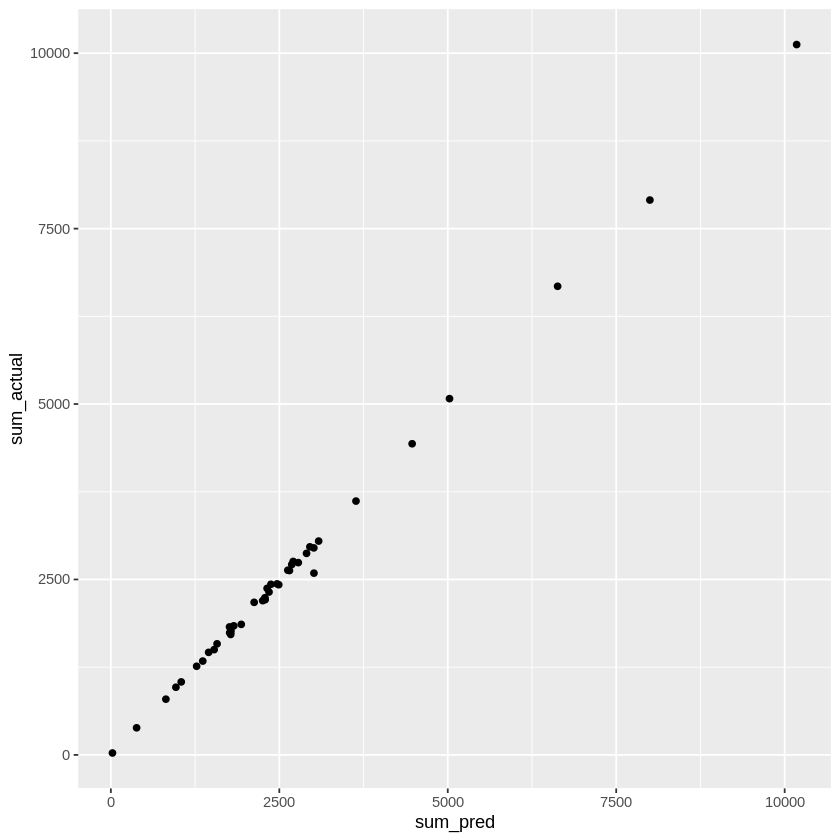

In [ ]:
ggplot(df_shop_result) +
  geom_point(aes(sum_pred,sum_actual))

In [ ]:
set.seed(123)
split = sample.split(df_shop_result$sum_actual, SplitRatio = 0.8)
training_set = subset(df_shop_result, split == TRUE)
test_set = subset(df_shop_result, split == FALSE)

In [ ]:
# Multivariable linear
mul_lin = lm(formula = sum_actual ~ sum_pred,
               data = training_set)
# Make predictions
predictions_lin <- mul_lin %>% predict(test_set)
# Model performance
data.frame(
  RMSE = RMSE(predictions_lin, test_set$sum_actual),
  R2 = R2(predictions_lin, test_set$sum_actual)
)

RMSE,R2
<dbl>,<dbl>
141.7004,0.9973903
